<a href="https://colab.research.google.com/github/Occtoluf/image-recognition-labs/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall -y tensorflow
!pip install tensorflow==2.19.0

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.0/645.0 MB ? eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 108.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 84.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50, InceptionV3, EfficientNetB0
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet
from tensorflow.keras.applications.inception_v3 import preprocess_input as preprocess_inception
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_effnet
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.preprocessing import image


Загрузка моделей

In [6]:
models = {
    "ResNet50": (ResNet50(weights='imagenet'), (224, 224), preprocess_resnet),
    "InceptionV3": (InceptionV3(weights='imagenet'), (299, 299), preprocess_inception),
    "EfficientNetB0": (EfficientNetB0(weights='imagenet'), (224, 224), preprocess_effnet)
}

def classify_image(img_path, model_name="ResNet50", top_n=5):
    model, img_size, preprocess = models[model_name]

    img = image.load_img(img_path, target_size=img_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess(x)

    preds = model.predict(x)
    results = decode_predictions(preds, top=top_n)[0]

    plt.figure(figsize=(6, 6))
    plt.imshow(image.load_img(img_path))
    plt.axis('off')
    plt.title(f"Prediction: {results[0][1]} ({results[0][2]:.3f})")
    plt.show()

    print(f"\n=== {model_name} ===")
    for i, (class_id, label, prob) in enumerate(results, 1):
        print(f"{i:2}. {label:20} → {prob:.4f}")

    return results

Фотографии заранее загружены в коллаб

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


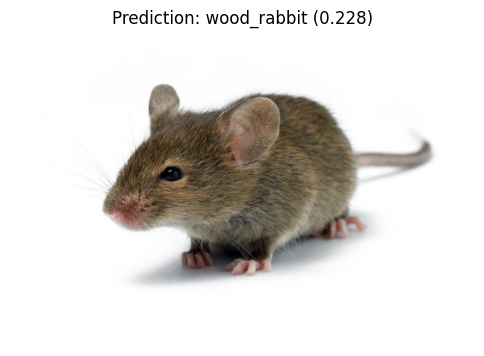


=== ResNet50 ===
 1. wood_rabbit          → 0.2276
 2. mousetrap            → 0.1938
 3. hare                 → 0.1741
 4. hamster              → 0.0948
 5. wombat               → 0.0586
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


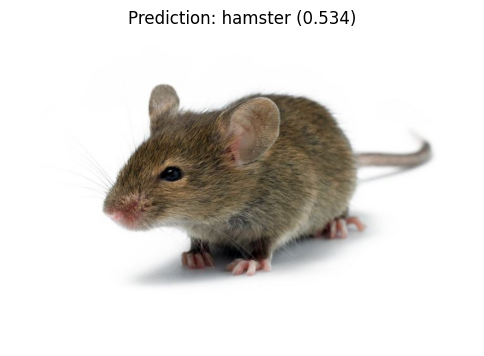


=== InceptionV3 ===
 1. hamster              → 0.5339
 2. wood_rabbit          → 0.1123
 3. mousetrap            → 0.0347
 4. hare                 → 0.0156
 5. broccoli             → 0.0145
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


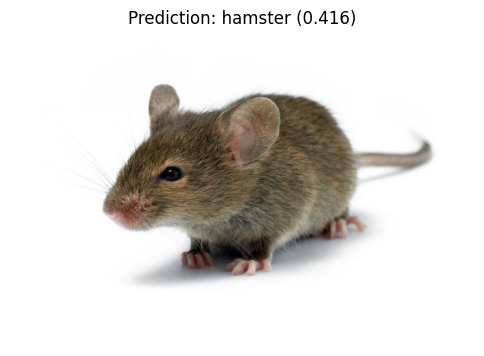


=== EfficientNetB0 ===
 1. hamster              → 0.4156
 2. wood_rabbit          → 0.2082
 3. hare                 → 0.0448
 4. mousetrap            → 0.0367
 5. guinea_pig           → 0.0346


[('n02342885', 'hamster', 0.4156364),
 ('n02325366', 'wood_rabbit', 0.20817226),
 ('n02326432', 'hare', 0.044843845),
 ('n03794056', 'mousetrap', 0.03668557),
 ('n02364673', 'guinea_pig', 0.034575194)]

In [ ]:
classify_image("mouse1.jpg", model_name="ResNet50")
classify_image("mouse1.jpg", model_name="InceptionV3")
classify_image("mouse1.jpg", model_name="EfficientNetB0")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


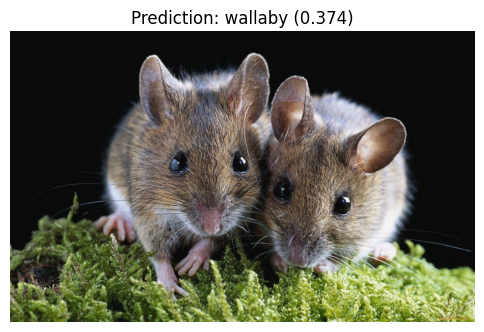


=== ResNet50 ===
 1. wallaby              → 0.3737
 2. hamster              → 0.1812
 3. armadillo            → 0.0655
 4. wombat               → 0.0515
 5. mousetrap            → 0.0347
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


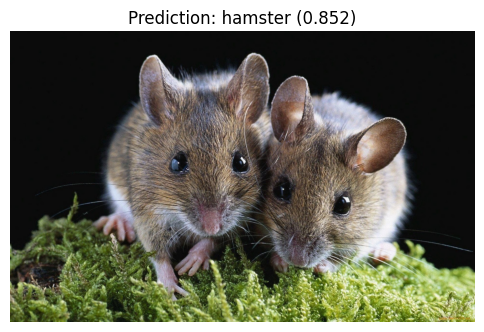


=== InceptionV3 ===
 1. hamster              → 0.8517
 2. broccoli             → 0.0114
 3. mousetrap            → 0.0042
 4. marmot               → 0.0038
 5. wood_rabbit          → 0.0034
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


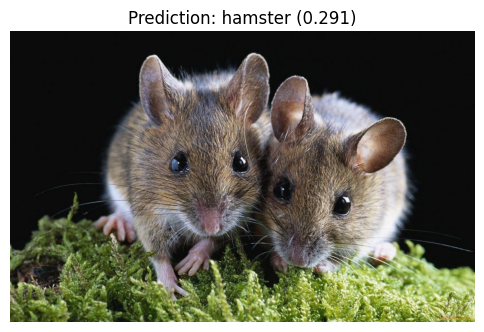


=== EfficientNetB0 ===
 1. hamster              → 0.2914
 2. wombat               → 0.1818
 3. wallaby              → 0.0372
 4. wood_rabbit          → 0.0261
 5. broccoli             → 0.0206


[('n02342885', 'hamster', np.float32(0.2914317)),
 ('n01883070', 'wombat', np.float32(0.18177737)),
 ('n01877812', 'wallaby', np.float32(0.03721772)),
 ('n02325366', 'wood_rabbit', np.float32(0.026125187)),
 ('n07714990', 'broccoli', np.float32(0.020640822))]

In [7]:
classify_image("mouse3.jpeg", model_name="ResNet50")
classify_image("mouse3.jpeg", model_name="InceptionV3")
classify_image("mouse3.jpeg", model_name="EfficientNetB0")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


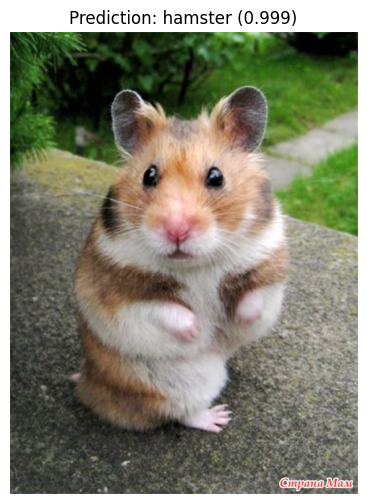


=== ResNet50 ===
 1. hamster              → 0.9995
 2. Pembroke             → 0.0002
 3. broccoli             → 0.0001
 4. weasel               → 0.0001
 5. guinea_pig           → 0.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


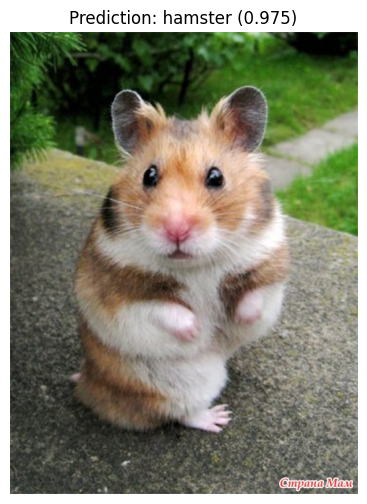


=== InceptionV3 ===
 1. hamster              → 0.9753
 2. broccoli             → 0.0009
 3. bell_cote            → 0.0004
 4. syringe              → 0.0003
 5. marmot               → 0.0002
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


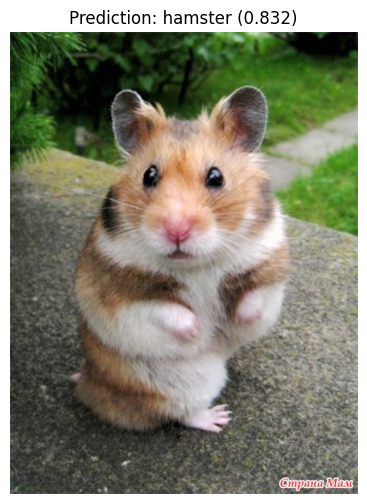


=== EfficientNetB0 ===
 1. hamster              → 0.8318
 2. Angora               → 0.0044
 3. Pembroke             → 0.0043
 4. hare                 → 0.0036
 5. broccoli             → 0.0035


[('n02342885', 'hamster', np.float32(0.83184046)),
 ('n02328150', 'Angora', np.float32(0.0044042626)),
 ('n02113023', 'Pembroke', np.float32(0.0043336535)),
 ('n02326432', 'hare', np.float32(0.0035618162)),
 ('n07714990', 'broccoli', np.float32(0.0034597253))]

In [8]:
classify_image("hamster.jpg", model_name="ResNet50")
classify_image("hamster.jpg", model_name="InceptionV3")
classify_image("hamster.jpg", model_name="EfficientNetB0")

Градиентная карта

In [9]:
!pip install tf-keras-vis --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 1.9 MB/s eta 0:00:00


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[('n02342885', 'hamster', np.float32(0.9753152)), ('n07714990', 'broccoli', np.float32(0.00092381146)), ('n02825657', 'bell_cote', np.float32(0.00036376857))]


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_4145']]
Received: inputs=Tensor(shape=(1, 299, 299, 3))
  warnings.warn(msg)


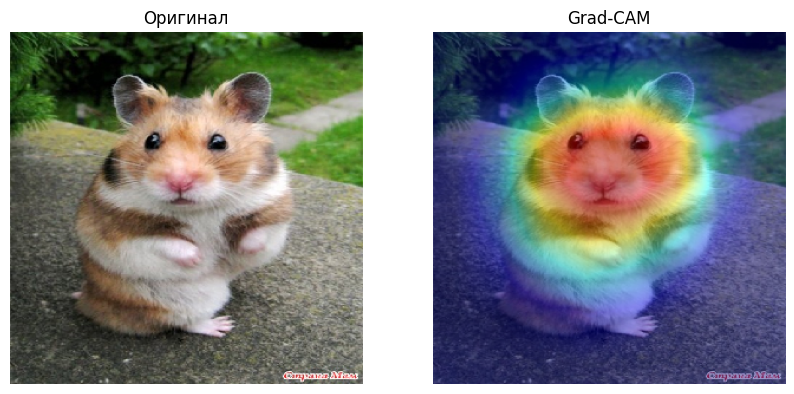

In [21]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# 1. Загружаем модель
model = InceptionV3(weights='imagenet')

# 2. Загружаем картинку
img_path = 'hamster.jpg'
# Correct target_size for InceptionV3
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# 3. Делаем предсказание
preds = model.predict(x)
print(decode_predictions(preds, top=3)[0])

# 4. Grad-CAM
# Correct last convolutional layer name for InceptionV3
last_conv_layer = model.get_layer('mixed10')

grad_model = tf.keras.models.Model(
    [model.inputs],
    [last_conv_layer.output, model.output]
)

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(x)
    class_idx = tf.argmax(predictions[0])
    loss = predictions[:, class_idx]

grads = tape.gradient(loss, conv_outputs)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

conv_outputs = conv_outputs[0]
heatmap = tf.reduce_sum(conv_outputs * pooled_grads, axis=-1)
heatmap = tf.nn.relu(heatmap)
heatmap /= tf.reduce_max(heatmap) + 1e-8

# 5. Делаем красивую картинку
heatmap = heatmap.numpy()
heatmap = cv2.resize(heatmap, (img.size[0], img.size[1]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

superimposed = cv2.addWeighted(np.array(img), 0.6, heatmap, 0.4, 0)

# 6. Показываем
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Оригинал')

plt.subplot(1, 2, 2)
plt.imshow(superimposed)
plt.axis('off')
plt.title('Grad-CAM')

plt.show()